# Final Experiment for Diploma thesis Bitcoin price prediction


#### Load all own need ipynb

In [2]:
%run Imports.ipynb
%run DataFrameBuilder.ipynb
%run ModelBuilder.ipynb
%run ModelEvaluator.ipynb
%run Trader.ipynb

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def RefreshImports():
    %run Imports.ipynb
    %run DataFrameBuilder.ipynb
    %run ModelBuilder.ipynb
    %run ModelEvaluator.ipynb
    %run Trader.ipynb

# Porovnanie základných a interpolovaných dát cien Nvidie


In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

In [ ]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny akcií Nvidia - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny akcií Nvidia - interpolované hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size': 16})


# Porovnanie ceny BTC na dennej a hodinovej granularite

In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

In [ ]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny Bitcoinu - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.close_price, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny Bitcoinu - hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.price_close, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})

# Porovnanie početností tried BTC na dennej a hodinovej granularite

In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')


In [ ]:
df['target'] = df.close_price.diff()
df['target'] =  np.where(df['target']>0, 'Rise', 'Fall')
dfl['target'] = dfl.price_close.diff()
dfl['target'] =  np.where(dfl['target']>0, 'Rise', 'Fall')

In [ ]:

fig, ax =plt.subplots(1,2,figsize = (14,4))
ax[0].set_title(f'Početnosť tried nárast a pokles \n Denná granularita', fontsize = 19)

plt.grid(True)
sns.countplot(df.target, ax=ax[0] )
ax[0].set_xlabel(" ", fontsize = 16)
ax[0].set_ylabel("Počet pozorovaní", fontsize = 16)

ax[1].set_title(f'Početnosť tried nárast a pokles \n Hodinová granularita', fontsize = 19)
plt.grid(True)
sns.countplot(dfl.target, ax=ax[1])
ax[1].set_xlabel(" ", fontsize = 16)
ax[1].set_ylabel("Počet pozorovaní", fontsize = 16)

fig.show()


# Vytvorenie .csv pre výsledky gridsearchu

In [ ]:
#df = Create2ClassResultDataframe()
#SaveTwoClassResult(df)

In [ ]:
df=Create3ClassResultDataframe()

In [ ]:
SaveThreeClassResult(df)

In [ ]:
no_sample= 6

# Binary Classification - RF

 - Gridsearch pre binárnu klasifikáciu RF
 - 10 behov s random splitom pre vyššiu relevantnosť výsledkov 
 - možná aj cross validácia

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [ ]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in tqdm(window_size):
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                y_testm = []
                y_predm = []
                count = count - 1 
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForTwoClass()
                else:
                    df = LoadDifferencedDatasetForTwoClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                for s in range(0, no_sample):    
                    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                    y_testm.append(y_test)
                    y_predm.append(y_pred)
                
                model = 'Random Forest'
                param = f'window_size: {i}  max_depth: {j} min_samples_split: {k} min_samples_leaf: {l}'
                resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
                SaveTwoClassResult(resultDf)

# 3Class Classification - RF

In [ ]:
no_sample= 6

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [ ]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in tqdm(window_size):
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                count = count - 1 
                y_testm = []
                y_predm = []
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForThreeClass()
                else:
                    df = LoadDifferencedDatasetForThreeClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                    
                for s in range(0, no_sample):   
                    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                    y_testm.append(y_test)
                    y_predm.append(y_pred)
                    
                model = 'Random Forest'
                param = f'window_size: {i}  max_depth: {j} min_samples_split: {k} min_samples_leaf: {l}'
                resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
                SaveThreeClassResult(resultDf)

# Binary Classification - GNB

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:

count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 )    
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'GaussianNB'
    param = f'window_size: {i}'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

# 3Class Classification - GNB

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in tqdm(window_size):
    count = count - 1 
    y_testm = []
    y_predm = []
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):  
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 ) 
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'GaussianNB'
    param = f'window_size: {i}'
    resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
    SaveThreeClassResult(resultDf)

# Binary Classification - SVC

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )   
        y_testm.append(y_test)
        y_predm.append(y_pred)
        
    model = 'SVC'
    param = f'window_size: {i} gama: scale'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

# 3Class Classification - SVC

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]

In [ ]:
count = (len(window_size))
for i in window_size:
    count = count - 1
    y_testm = []
    y_predm = []
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )    
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'SVC'
    param = f'window_size: {i} gama: scale'
    resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
    SaveThreeClassResult(resultDf)

# Binary Classification - KNN

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
n_neighbors = [ x for x in range(5,15) ]

In [ ]:
count = (len(window_size)* len(n_neighbors))
for i in tqdm(window_size):
    for j in n_neighbors:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForTwoClass()
        else:
            df = LoadDifferencedDatasetForTwoClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'KNN'
        param = f'window_size: {i} n_neighbors: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# 3Class Classification - KNN

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
n_neighbors = [ x for x in range(5,15) ]

In [ ]:
count = (len(window_size)* len(n_neighbors))
for i in tqdm(window_size):
    for j in n_neighbors:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForThreeClass()
        else:
            df = LoadDifferencedDatasetForThreeClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = "KNN"
        param = f'window_size: {i}, n_neighbors: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Binary -  Linear regression - Classic approach

In [ ]:
no_sample = 4

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)
            
        for s in range(0, no_sample):
            y_test , y_pred = RegressionClassicPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# Linear regression - Classic approach

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = Regression(df, train_ratio=0.80)
        
        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        #msle = mean_squared_log_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        #mpd = mean_poisson_deviance(y_true, y_pred)
        #mgd = mean_gamma_deviance(y_true, y_pred)
        #mtd = mean_tweedie_deviance(y_true, y_pred, power=1)
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j}'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# 3Class -  Linear regression - Classic approach


In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionClassicPredictThreeClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
        
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Linear regression - Rolling approach

In [ ]:
RefreshImports()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = RegressionRolling(df, train_ratio=0.80)

        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        #msle = mean_squared_log_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        #mpd = mean_poisson_deviance(y_true, y_pred)
        #mgd = mean_gamma_deviance(y_true, y_pred)
        #mtd = mean_tweedie_deviance(y_true, y_pred, power=1)
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j} rolling approach'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# Binary Linear regression - Rolling approach

In [ ]:
RefreshImports()

In [ ]:
no_sample = 5

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionRollingPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
        
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j} rolling approach'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# 3Class Linear regression - Rolling approach

In [ ]:
RefreshImports()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionRollingPredictThreeClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
            
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j} rolling approach'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# ARIMA Model - 2Class
### Think about your life before u runt it

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue           
            model = 'ARIMA'
            param = f'p: {i} d: {j} q: {k}'
            resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
            SaveTwoClassResult(resultDf)

# ARIMA Model - 3Class
### Think about your life before u runt it

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima3Class(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
            SaveThreeClassResult(resultDf)

# ARIMA Model -Regression
### Think about your life before u runt it

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_true , y_pred = DefArimaRegression(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            evs  = explained_variance_score(y_true, y_pred)
            me = max_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            meae = median_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
            SaveRegressionResultDataframe(resultDf)

# Analyse results for binary prediction

In [80]:
resultDf = OpenTwoClassResult()

In [8]:
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
208,Random Forest,window_size: 1 max_depth: 5 min_samples_split...,0.582958,0.575506,0.597800,0.711385,0.449172,0.635732,0.511962
55,Random Forest,window_size: 0 max_depth: 7 min_samples_split...,0.580296,0.578470,0.584805,0.667737,0.489533,0.619287,0.531974
10,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.580155,0.584216,0.575707,0.665937,0.488316,0.621902,0.527687


In [ ]:
resultDf[resultDf['Model'] == 'ARIMA'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'KNN'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'SVC'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'GaussianNB'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'Linear Regression'].sort_values('Accuracy', ascending=False).head(3)

# Analyse results for three class prediction

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'ARIMA'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'KNN'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'SVC'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'GaussianNB'].sort_values('Accuracy', ascending=False).head(3)

In [ ]:
resultDf[resultDf['Model'] == 'Linear Regression'].sort_values('Accuracy', ascending=False).head(3)

In [3]:
resultDf = OpenRegressionResultDataframe()

In [4]:
resultDf.sort_values('mean_absolute_error', ascending=True).head(3)
#best O

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
37,Linear Regression,"window_size: 0, normalize: True rolling approach",0.115388,24.842097,0.532390,1.381433,0.293383,0.115304
38,Linear Regression,"window_size: 0, normalize: False rolling approach",0.115388,24.842097,0.532390,1.381433,0.293383,0.115304
22,Linear Regression,"window_size: 0, normalize: False",0.111182,24.811791,0.536215,1.389043,0.297454,0.110431


In [9]:
resultDf.sort_values('mean_squared_error', ascending=True).head(50)
#best O

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
1,ARIMA,"p: 0, d: 0, q: 1",0.137300,25.083497,0.536626,1.347162,0.280134,0.137253
2,ARIMA,"p: 0, d: 0, q: 2",0.136161,25.084547,0.536798,1.348947,0.278368,0.136109
8,ARIMA,"p: 1, d: 0, q: 1",0.136013,25.084651,0.536817,1.349178,0.278285,0.135961
12,ARIMA,"p: 2, d: 0, q: 1",0.135725,25.082278,0.536790,1.349632,0.279873,0.135671
15,ARIMA,"p: 4, d: 0, q: 0",0.134680,25.081570,0.537157,1.351268,0.281622,0.134623
17,ARIMA,"p: 4, d: 0, q: 2",0.134353,25.050235,0.539246,1.351782,0.281375,0.134294
16,ARIMA,"p: 4, d: 0, q: 1",0.134190,25.061385,0.537749,1.352031,0.279661,0.134134
19,ARIMA,"p: 4, d: 1, q: 1",0.135255,25.149719,0.537829,1.353047,0.288723,0.133484
11,ARIMA,"p: 2, d: 0, q: 0",0.132775,25.079003,0.537363,1.354232,0.281479,0.132725
7,ARIMA,"p: 1, d: 0, q: 0",0.120046,25.052918,0.537880,1.374098,0.285159,0.120002


In [ ]:
resultDf.sort_values('median_absolute_error', ascending=True).head(3)
#best O

In [ ]:
resultDf.sort_values('r2_score', ascending=False).head(3)
#best 1

# Train best RF MODEL

### Check best param  

In [75]:
RefreshImports()

In [76]:
resultDf = OpenTwoClassResult()
pd.options.display.max_colwidth = 150
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(2)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
208,Random Forest,window_size: 1 max_depth: 5 min_samples_split: 3 min_samples_leaf: 4,0.582958,0.575506,0.597800,0.711385,0.449172,0.635732,0.511962
55,Random Forest,window_size: 0 max_depth: 7 min_samples_split: 5 min_samples_leaf: 1,0.580296,0.578470,0.584805,0.667737,0.489533,0.619287,0.531974


In [77]:
df = LoadTradeDataset2Class()

#### Run simulation with best parameter model 

In [78]:
bilance = SimulateTradeRF(df, no_runs=150, steps=False, max_depth=7, min_samples_split=5, min_samples_leaf = 1)




======================= GLOBAL BALANCE =======================
=========================== 34.38% ===========================





======================= GLOBAL BALANCE =======================
=========================== -20.67% ==========================





======================= GLOBAL BALANCE =======================
=========================== 50.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== -5.51% ===========================





======================= GLOBAL BALANCE =======================
=========================== -47.02% ==========================





======================= GLOBAL BALANCE =======================
=========================== 27.64% ===========================





======================= GLOBAL BALANCE =======================
=========================== 75.95% ===========================





======================= GLOBAL BALANCE =======================
=========================== 2.44% ============================





======================= GLOBAL BALANCE =======================
=========================== 12.52% ===========================





======================= GLOBAL BALANCE =======================
=========================== 99.06% ===========================





======================= GLOBAL BALANCE =======================
=========================== 32.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== -12.83% ==========================





======================= GLOBAL BALANCE =======================
=========================== 42.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== 3.46% ============================





======================= GLOBAL BALANCE =======================
=========================== 9.5% =============================





======================= GLOBAL BALANCE =======================
=========================== -0.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== 6.68% ============================





======================= GLOBAL BALANCE =======================
=========================== 56.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== -30.69% ==========================





======================= GLOBAL BALANCE =======================
=========================== 12.74% ===========================





======================= GLOBAL BALANCE =======================
=========================== 64.93% ===========================





======================= GLOBAL BALANCE =======================
=========================== 34.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.39% ============================





======================= GLOBAL BALANCE =======================
=========================== -23.7% ===========================





======================= GLOBAL BALANCE =======================
=========================== -49.47% ==========================





======================= GLOBAL BALANCE =======================
=========================== 145.83% ==========================





======================= GLOBAL BALANCE =======================
=========================== 35.82% ===========================





======================= GLOBAL BALANCE =======================
=========================== 40.05% ===========================





======================= GLOBAL BALANCE =======================
=========================== 222.07% ==========================





======================= GLOBAL BALANCE =======================
=========================== 26.54% ===========================





======================= GLOBAL BALANCE =======================
=========================== -7.47% ===========================





======================= GLOBAL BALANCE =======================
=========================== 42.85% ===========================





======================= GLOBAL BALANCE =======================
=========================== -23.81% ==========================





======================= GLOBAL BALANCE =======================
=========================== 30.86% ===========================





======================= GLOBAL BALANCE =======================
=========================== 50.8% ============================





======================= GLOBAL BALANCE =======================
=========================== 45.21% ===========================





======================= GLOBAL BALANCE =======================
=========================== 1.8% =============================





======================= GLOBAL BALANCE =======================
=========================== -18.67% ==========================





======================= GLOBAL BALANCE =======================
=========================== -1.81% ===========================





======================= GLOBAL BALANCE =======================
=========================== 2.6% =============================





======================= GLOBAL BALANCE =======================
=========================== -27.53% ==========================





======================= GLOBAL BALANCE =======================
=========================== -1.6% ============================





======================= GLOBAL BALANCE =======================
=========================== -25.27% ==========================





======================= GLOBAL BALANCE =======================
=========================== 9.57% ============================





======================= GLOBAL BALANCE =======================
=========================== 79.37% ===========================





======================= GLOBAL BALANCE =======================
=========================== 100.43% ==========================





======================= GLOBAL BALANCE =======================
=========================== -15.67% ==========================





======================= GLOBAL BALANCE =======================
=========================== -24.37% ==========================





======================= GLOBAL BALANCE =======================
=========================== 109.22% ==========================





======================= GLOBAL BALANCE =======================
=========================== 99.23% ===========================





======================= GLOBAL BALANCE =======================
=========================== 14.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== 21.01% ===========================





======================= GLOBAL BALANCE =======================
=========================== 28.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== 20.38% ===========================





======================= GLOBAL BALANCE =======================
=========================== 36.65% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.61% ===========================





======================= GLOBAL BALANCE =======================
=========================== -25.46% ==========================





======================= GLOBAL BALANCE =======================
=========================== -12.03% ==========================





======================= GLOBAL BALANCE =======================
=========================== 16.33% ===========================





======================= GLOBAL BALANCE =======================
=========================== -28.65% ==========================





======================= GLOBAL BALANCE =======================
=========================== 110.88% ==========================





======================= GLOBAL BALANCE =======================
=========================== 16.43% ===========================





======================= GLOBAL BALANCE =======================
=========================== 92.66% ===========================





======================= GLOBAL BALANCE =======================
=========================== 1.87% ============================





======================= GLOBAL BALANCE =======================
=========================== 25.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 113.15% ==========================





======================= GLOBAL BALANCE =======================
=========================== 27.73% ===========================





======================= GLOBAL BALANCE =======================
=========================== 18.74% ===========================





======================= GLOBAL BALANCE =======================
=========================== 34.7% ============================





======================= GLOBAL BALANCE =======================
=========================== 2.97% ============================





======================= GLOBAL BALANCE =======================
=========================== 3.73% ============================





======================= GLOBAL BALANCE =======================
=========================== 16.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== 131.82% ==========================





======================= GLOBAL BALANCE =======================
=========================== 10.68% ===========================





======================= GLOBAL BALANCE =======================
=========================== -21.48% ==========================





======================= GLOBAL BALANCE =======================
=========================== -22.93% ==========================





======================= GLOBAL BALANCE =======================
=========================== -13.46% ==========================





======================= GLOBAL BALANCE =======================
=========================== 68.45% ===========================





======================= GLOBAL BALANCE =======================
=========================== 16.58% ===========================





======================= GLOBAL BALANCE =======================
=========================== 12.61% ===========================





======================= GLOBAL BALANCE =======================
=========================== 3.13% ============================





======================= GLOBAL BALANCE =======================
=========================== 135.51% ==========================





======================= GLOBAL BALANCE =======================
=========================== 54.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== 46.93% ===========================





======================= GLOBAL BALANCE =======================
=========================== 111.88% ==========================





======================= GLOBAL BALANCE =======================
=========================== 101.52% ==========================





======================= GLOBAL BALANCE =======================
=========================== 17.13% ===========================





======================= GLOBAL BALANCE =======================
=========================== 69.68% ===========================





======================= GLOBAL BALANCE =======================
=========================== -42.89% ==========================





======================= GLOBAL BALANCE =======================
=========================== -11.46% ==========================





======================= GLOBAL BALANCE =======================
=========================== 15.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== 19.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== 14.75% ===========================





======================= GLOBAL BALANCE =======================
=========================== 54.78% ===========================





======================= GLOBAL BALANCE =======================
=========================== 99.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 40.0% ============================





======================= GLOBAL BALANCE =======================
=========================== 47.39% ===========================





======================= GLOBAL BALANCE =======================
=========================== -15.17% ==========================





======================= GLOBAL BALANCE =======================
=========================== 84.25% ===========================





======================= GLOBAL BALANCE =======================
=========================== 73.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== -17.57% ==========================





======================= GLOBAL BALANCE =======================
=========================== 29.2% ============================





======================= GLOBAL BALANCE =======================
=========================== 41.66% ===========================





======================= GLOBAL BALANCE =======================
=========================== 17.02% ===========================





======================= GLOBAL BALANCE =======================
=========================== 28.11% ===========================





======================= GLOBAL BALANCE =======================
=========================== -20.52% ==========================





======================= GLOBAL BALANCE =======================
=========================== -43.42% ==========================





======================= GLOBAL BALANCE =======================
=========================== 65.64% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== 90.5% ============================





======================= GLOBAL BALANCE =======================
=========================== 93.61% ===========================





======================= GLOBAL BALANCE =======================
=========================== -14.96% ==========================





======================= GLOBAL BALANCE =======================
=========================== 21.55% ===========================





======================= GLOBAL BALANCE =======================
=========================== 13.8% ============================





======================= GLOBAL BALANCE =======================
=========================== -43.11% ==========================





======================= GLOBAL BALANCE =======================
=========================== -6.81% ===========================





======================= GLOBAL BALANCE =======================
=========================== 47.48% ===========================





======================= GLOBAL BALANCE =======================
=========================== -5.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== 30.84% ===========================





======================= GLOBAL BALANCE =======================
=========================== -31.22% ==========================





======================= GLOBAL BALANCE =======================
=========================== -8.5% ============================





======================= GLOBAL BALANCE =======================
=========================== 21.82% ===========================





======================= GLOBAL BALANCE =======================
=========================== -2.92% ===========================





======================= GLOBAL BALANCE =======================
=========================== 6.63% ============================





======================= GLOBAL BALANCE =======================
=========================== -23.23% ==========================





======================= GLOBAL BALANCE =======================
=========================== -22.1% ===========================





======================= GLOBAL BALANCE =======================
=========================== 11.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 3.51% ============================





======================= GLOBAL BALANCE =======================
=========================== 65.82% ===========================





======================= GLOBAL BALANCE =======================
=========================== 50.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== 216.91% ==========================





======================= GLOBAL BALANCE =======================
=========================== 44.55% ===========================





======================= GLOBAL BALANCE =======================
=========================== 65.34% ===========================





======================= GLOBAL BALANCE =======================
=========================== -22.48% ==========================





======================= GLOBAL BALANCE =======================
=========================== 23.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== 28.67% ===========================





======================= GLOBAL BALANCE =======================
=========================== 9.54% ============================





======================= GLOBAL BALANCE =======================
=========================== 23.39% ===========================





======================= GLOBAL BALANCE =======================
=========================== 37.42% ===========================





======================= GLOBAL BALANCE =======================
=========================== 103.78% ==========================





======================= GLOBAL BALANCE =======================
=========================== 87.1% ============================





======================= GLOBAL BALANCE =======================
=========================== 29.46% ===========================





======================= GLOBAL BALANCE =======================
=========================== -13.4% ===========================





======================= GLOBAL BALANCE =======================
=========================== 62.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== -23.88% ==========================





======================= GLOBAL BALANCE =======================
=========================== -34.58% ==========================





======================= GLOBAL BALANCE =======================
=========================== -32.81% ==========================





======================= GLOBAL BALANCE =======================
=========================== -25.51% ==========================





======================= GLOBAL BALANCE =======================
=========================== 19.34% ===========================





======================= GLOBAL BALANCE =======================
=========================== 47.93% ===========================



In [79]:
a = []
label = [a.append(x) for x in range(0, len(bilance))]

Text(80, 160, 'Priemerné zhodnotenie 26.34%')

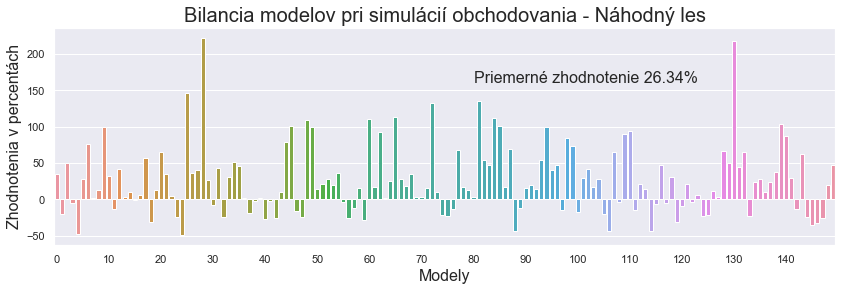

In [84]:
plt.figure(figsize = (14,4))
plt.grid(True)
plt.title(f'Bilancia modelov pri simulácií obchodovania - Náhodný les', fontsize = 20)
plt.xlabel("Modely", fontsize = 16)
plt.ylabel("Zhodnotenia v percentách", fontsize = 16)
plot_ = sns.barplot(x = a, y = bilance)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plot_.text(80, 160, f'Priemerné zhodnotenie {round(np.array(bilance).mean(), 2)}%', fontsize=16)